In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, mannwhitneyu, pearsonr, spearmanr

In [2]:
df1 = pd.read_csv('dataset1_clean.csv')
df2 = pd.read_csv('dataset2_clean.csv')

In [9]:
#Transform and Categorise Columns

#Transform 'seconds_after_rat_arrival' to 'vigilance'
df1['vigilance'] = df1['seconds_after_rat_arrival']

# Categorise vigilance levels
def vigilance_category(val):
    if val < 10:
        return 'Low'
    elif val < 30:
        return 'Medium'
    else:
        return 'High'

df1['vigilance_level'] = df1['vigilance'].apply(vigilance_category)

# Categorise hours_after_sunset
def night_period(val):
    if val < 3:
        return 'Early night'
    else:
        return 'Late night'

df1['night_period'] = df1['hours_after_sunset'].apply(night_period)
df2['night_period'] = df2['hours_after_sunset'].apply(night_period)

In [10]:
# --- Descriptive Statistics ---

desc_cols = ['vigilance', 'hours_after_sunset']
desc_stats = df1[desc_cols + ['risk', 'reward']].describe()
desc_stats.loc['range'] = desc_stats.loc['max'] - desc_stats.loc['min']
desc_stats.loc['variance'] = df1[desc_cols + ['risk', 'reward']].var()
desc_stats.loc['median'] = df1[desc_cols + ['risk', 'reward']].median()
desc_stats.loc['std'] = df1[desc_cols + ['risk', 'reward']].std()

print("Summary statistics for key variables (Dataset 1):")
print(desc_stats)

Summary statistics for key variables (Dataset 1):
             vigilance  hours_after_sunset        risk      reward
count       878.000000          878.000000  878.000000  878.000000
mean        280.593394            5.623992    0.506834    0.542141
std         237.702841            2.343495    0.500238    0.498505
min           0.000000            0.138611    0.000000    0.000000
25%          90.000000            3.826528    0.000000    0.000000
50%         205.000000            5.703333    1.000000    1.000000
75%         444.500000            7.445694    1.000000    1.000000
max         949.000000           12.091944    1.000000    1.000000
range       949.000000           11.953333    1.000000    1.000000
variance  56502.640640            5.491969    0.250238    0.248507
median      205.000000            5.703333    1.000000    1.000000


C:\Users\dlihi\AppData\Local\Temp\ipykernel_29416\1585437240.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='risk', data=df1, palette='Set2')


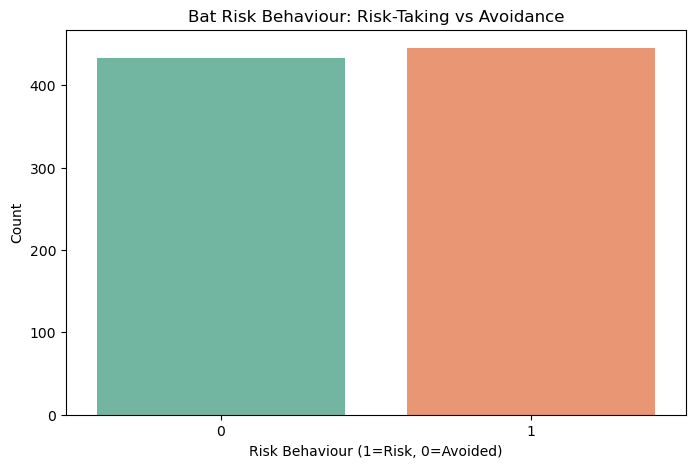

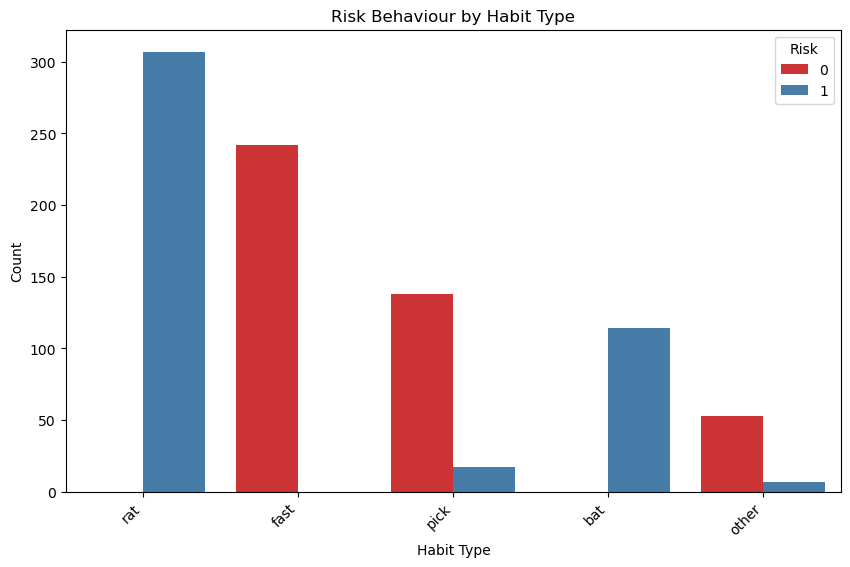

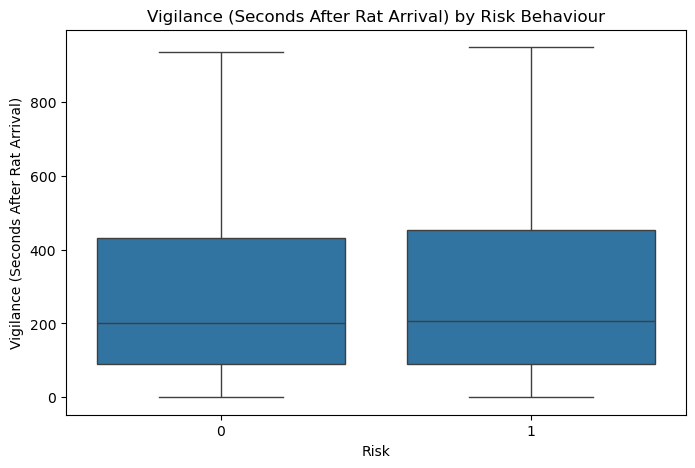

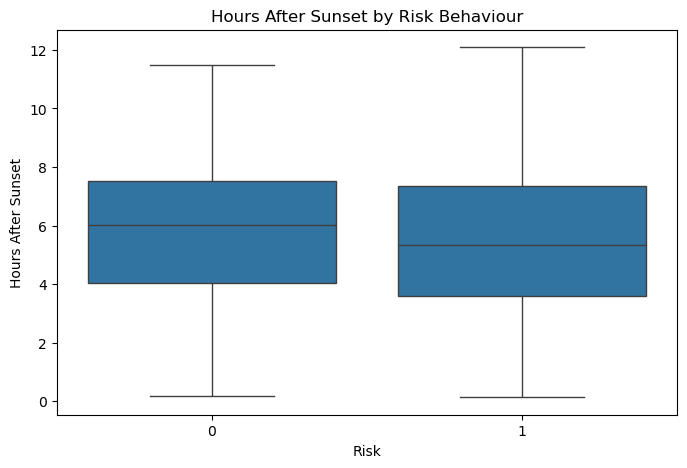

C:\Users\dlihi\AppData\Local\Temp\ipykernel_29416\1585437240.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vigilance_level', data=df1, palette='Set3')


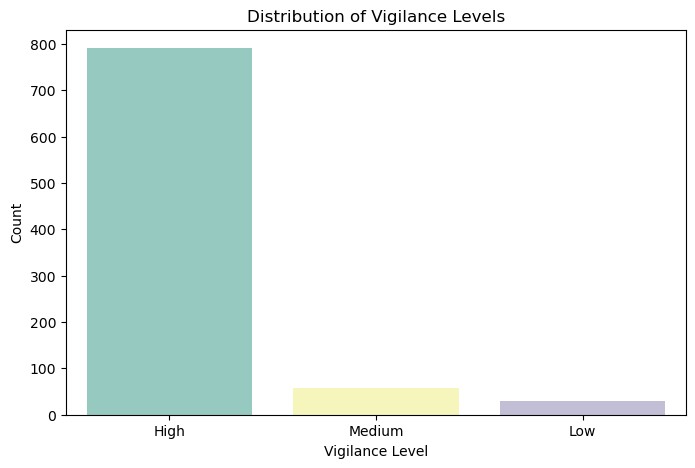

C:\Users\dlihi\AppData\Local\Temp\ipykernel_29416\1585437240.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='night_period', data=df1, palette='coolwarm')


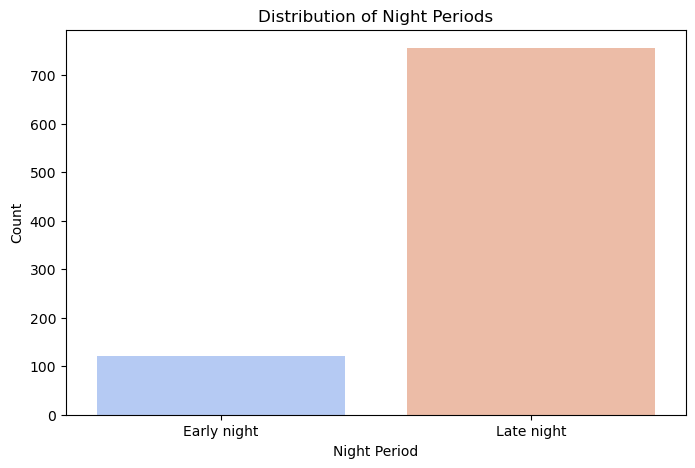

In [11]:
# --- Graphs: Risk Behaviour ---

plt.figure(figsize=(8,5))
sns.countplot(x='risk', data=df1, palette='Set2')
plt.title('Bat Risk Behaviour: Risk-Taking vs Avoidance')
plt.xlabel('Risk Behaviour (1=Risk, 0=Avoided)')
plt.ylabel('Count')
plt.show()

# Risk behaviour by habit type
plt.figure(figsize=(10,6))
sns.countplot(x='habit', hue='risk', data=df1, palette='Set1')
plt.title('Risk Behaviour by Habit Type')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Habit Type')
plt.ylabel('Count')
plt.legend(title='Risk')
plt.show()

# Distribution of vigilance by risk
plt.figure(figsize=(8,5))
sns.boxplot(x='risk', y='vigilance', data=df1)
plt.title('Vigilance (Seconds After Rat Arrival) by Risk Behaviour')
plt.xlabel('Risk')
plt.ylabel('Vigilance (Seconds After Rat Arrival)')
plt.show()

# Distribution of hours_after_sunset by risk
plt.figure(figsize=(8,5))
sns.boxplot(x='risk', y='hours_after_sunset', data=df1)
plt.title('Hours After Sunset by Risk Behaviour')
plt.xlabel('Risk')
plt.ylabel('Hours After Sunset')
plt.show()

# Vigilance level distribution
plt.figure(figsize=(8,5))
sns.countplot(x='vigilance_level', data=df1, palette='Set3')
plt.title('Distribution of Vigilance Levels')
plt.xlabel('Vigilance Level')
plt.ylabel('Count')
plt.show()

# Hours after sunset categorised
plt.figure(figsize=(8,5))
sns.countplot(x='night_period', data=df1, palette='coolwarm')
plt.title('Distribution of Night Periods')
plt.xlabel('Night Period')
plt.ylabel('Count')
plt.show()

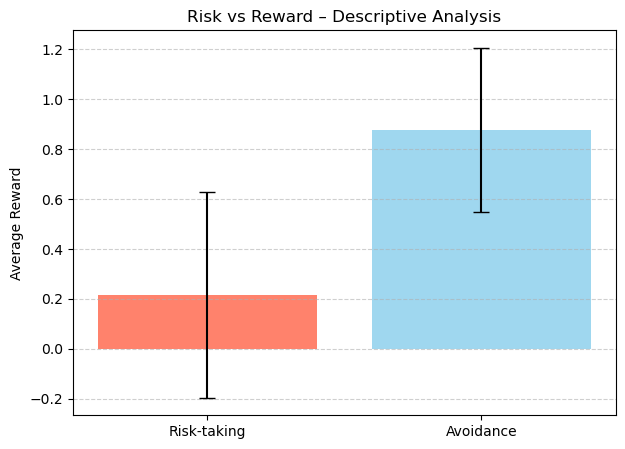

C:\Users\dlihi\AppData\Local\Temp\ipykernel_29416\1789259341.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([risk_group_rewards.dropna(), avoid_group_rewards.dropna()],


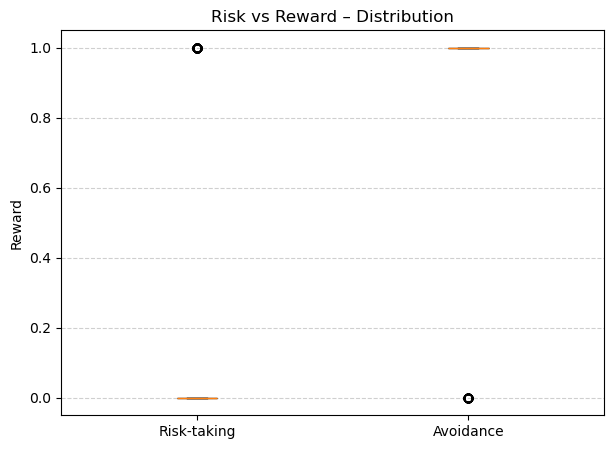

In [15]:
# --- Risk vs Reward Descriptive Analysis ---

# Plot bar chart with error bars
plt.figure(figsize=(7,5))
plt.bar(groups, means, yerr=stds, capsize=6, color=['tomato', 'skyblue'], alpha=0.8)
plt.ylabel("Average Reward")
plt.title("Risk vs Reward – Descriptive Analysis")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Optional: Boxplot to show distribution
plt.figure(figsize=(7,5))
plt.boxplot([risk_group_rewards.dropna(), avoid_group_rewards.dropna()],
            labels=['Risk-taking', 'Avoidance'],
            patch_artist=True,
            boxprops=dict(facecolor='lightblue'))
plt.ylabel("Reward")
plt.title("Risk vs Reward – Distribution")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


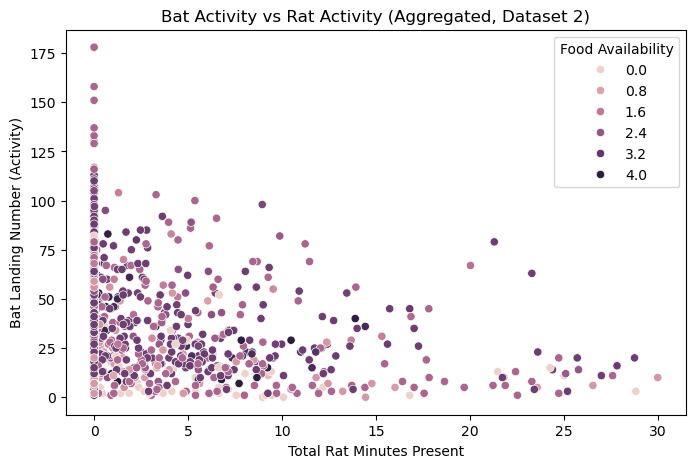

In [12]:
# --- Descriptive analysis on aggregated Dataset2 ---

plt.figure(figsize=(8,5))
sns.scatterplot(x='rat_minutes', y='bat_landing_number', hue='food_availability', data=df2)
plt.title('Bat Activity vs Rat Activity (Aggregated, Dataset 2)')
plt.xlabel('Total Rat Minutes Present')
plt.ylabel('Bat Landing Number (Activity)')
plt.legend(title='Food Availability')
plt.show()

Mean bat activity (rats present): 28.996031746031747
Mean bat activity (rats absent): 36.259179265658744


C:\Users\dlihi\AppData\Local\Temp\ipykernel_29416\963822752.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df2['rat_present'], y=df2['bat_landing_number'], palette='coolwarm')


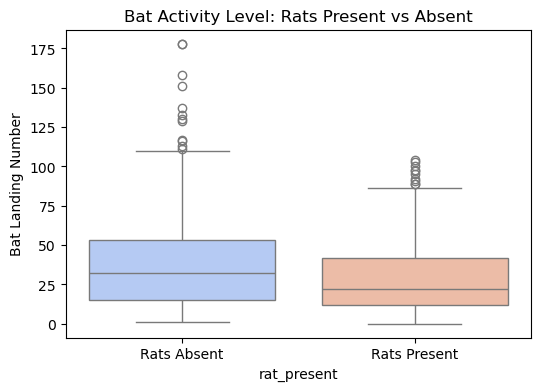

In [13]:
# General Patterns from Dataset 2 (Aggregated)

# Compare bat activity when rats present (rat_arrival_number>0) vs absent
df2['rat_present'] = (df2['rat_arrival_number'] > 0).astype(int)
activity_present = df2[df2['rat_present']==1]['bat_landing_number']
activity_absent = df2[df2['rat_present']==0]['bat_landing_number']

print("Mean bat activity (rats present):", activity_present.mean())
print("Mean bat activity (rats absent):", activity_absent.mean())

plt.figure(figsize=(6,4))
sns.boxplot(x=df2['rat_present'], y=df2['bat_landing_number'], palette='coolwarm')
plt.xticks([0,1], ['Rats Absent', 'Rats Present'])
plt.ylabel('Bat Landing Number')
plt.title('Bat Activity Level: Rats Present vs Absent')
plt.show()


In [7]:
#Inferential Statistics: Null Hypothesis Testing

#Test: Is there a significant difference in bat risk-taking when rats are present?
#We'll use vigilance as a vigilance measure, risk as risk-taking.
risk_taken = df1[df1['risk']==1]['vigilance']
risk_avoided = df1[df1['risk']==0]['vigilance']

#t-test for vigilance between risk/avoid groups
t_stat, p_value = stats.ttest_ind(risk_taken, risk_avoided, equal_var=False)
print(f"T-test for vigilance between risk/avoid groups: t={t_stat:.3f}, p={p_value:.4f}")

#Chi-square for risk-taking proportion by habit type
contingency = pd.crosstab(df1['habit'], df1['risk'])
chi2, p_chi, dof, expected = stats.chi2_contingency(contingency)
print(f"Chi-square test for association between habit type and risk-taking: chi2={chi2:.2f}, p={p_chi:.4f}")

#Mann-Whitney U Test for bat activity in Dataset2 (present vs absent)
u_stat, p_u = stats.mannwhitneyu(activity_present, activity_absent, alternative='two-sided')
print(f"Mann-Whitney U test for bat activity (rats present vs absent): U={u_stat}, p={p_u:.4f}")

T-test for vigilance between risk/avoid groups: t=0.494, p=0.6211
Chi-square test for association between habit type and risk-taking: chi2=792.71, p=0.0000
Mann-Whitney U test for bat activity (rats present vs absent): U=294506.0, p=0.0000


In [17]:
#Inferential Analysis

#Null hypothesis: no significant difference in bat risk behaviour when rats are present
#Compare vigilance and hours_after_sunset between risk-taking and avoidance groups

risk_group = df1[df1['risk'] == 1]
avoid_group = df1[df1['risk'] == 0]

# t-test for vigilance
stat, p = ttest_ind(risk_group['vigilance'].dropna(),
                    avoid_group['vigilance'].dropna(),
                    nan_policy='omit')
print(f"T-test for vigilance between Risk and Avoidance groups: stat={stat:.3f}, p={p:.3f}")
if p < 0.05:
    print("Significant difference (reject Ho)")
else:
    print("No significant difference (fail to reject Ho)")

#t-test for hours_after_sunset
stat_h, p_h = ttest_ind(risk_group['hours_after_sunset'].dropna(),
                        avoid_group['hours_after_sunset'].dropna(),
                        nan_policy='omit')
print(f"T-test for hours_after_sunset between Risk and Avoidance groups: stat={stat_h:.3f}, p={p_h:.3f}")
if p_h < 0.05:
    print("Significant difference (reject Ho)")
else:
    print("No significant difference (fail to reject Ho)")

#Split rewards by risk groups
reward_risk = df1[df1['risk'] == 1]['reward']   # rewards for risk-takers
reward_no_risk = df1[df1['risk'] == 0]['reward'] # rewards for avoiders

#Independent Samples T-test
t_stat, p_t = stats.ttest_ind(reward_risk, reward_no_risk, equal_var=False)
print(f"T-test for rewards (risk vs avoid): t={t_stat:.3f}, p={p_t:.4f}")

#Mann-Whitney U Test (non-parametric alternative)
u_stat, p_u = stats.mannwhitneyu(reward_risk, reward_no_risk, alternative='two-sided')
print(f"Mann-Whitney U test for rewards (risk vs avoid): U={u_stat}, p={p_u:.4f}")

print(f"Mann-Whitney U Test for reward between Risk and Reward groups: stat={stat_h:.3f}, p={p_h:.3f}")
if p_h < 0.05:
    print("Significant difference (reject Ho)")
else:
    print("No significant difference (fail to reject Ho)")

#Correlations

corr_vig_risk, p_corr_vig_risk = pearsonr(df1['risk'], df1['vigilance'])
corr_hour_risk, p_corr_hour_risk = pearsonr(df1['risk'], df1['hours_after_sunset'])
corr_reward_risk, p_corr_reward_risk = pearsonr(df1['risk'], df1['reward'])

print(f"Correlation between risk and vigilance: r={corr_vig_risk:.2f}, p={p_corr_vig_risk:.3f}")
print(f"Correlation between risk and hours_after_sunset: r={corr_hour_risk:.2f}, p={p_corr_hour_risk:.3f}")
print(f"Correlation between risk and reward: r={corr_reward_risk:.2f}, p={p_corr_reward_risk:.3f}")

T-test for vigilance between Risk and Avoidance groups: stat=0.494, p=0.621
No significant difference (fail to reject Ho)
T-test for hours_after_sunset between Risk and Avoidance groups: stat=-2.407, p=0.016
Significant difference (reject Ho)
T-test for rewards (risk vs avoid): t=-26.375, p=0.0000
Mann-Whitney U test for rewards (risk vs avoid): U=32576.5, p=0.0000
Mann-Whitney U Test for reward between Risk and Reward groups: stat=-2.407, p=0.016
Significant difference (reject Ho)
Correlation between risk and vigilance: r=0.02, p=0.621
Correlation between risk and hours_after_sunset: r=-0.08, p=0.016
Correlation between risk and reward: r=-0.66, p=0.000
